# 한국투자증권 데이터

## feature 1. MZ세대가 MZ아닌세대 보다 약 2배 주문건수가 많다.

## Insight 1. MZ세대에게 주식투자 관련 마케팅을 하면 어떨까?
## Insight 2. MZ세대가 선호하는 주식 종목이 있을까?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc

pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.5f}'.format
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [2]:
han = pd.read_excel('c:\\data\\fin\\2021금융데이터 경진대회_데이터셋_한국투자증권(원본).xlsx')
han.head()

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부
0,A0001,20200128,1,30,경기,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N
1,A0001,20200130,1,30,경기,3,00000A045060,오공,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,N,N
2,A0001,20200313,1,30,경기,1,00000A253840,수젠텍,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,N,N
3,A00010,20200220,1,20,경남,3,00000A009190,대양금속보통주,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,N,N
4,A000100,20200211,2,40,서울,1,00000A001740,SK네트웍스보통주,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,N,N


In [3]:
han['동일나이군구분코드'].unique()

array([30, 20, 40, 50], dtype=int64)

In [4]:
han['거래소구분코드'].unique()

array([3, 2], dtype=int64)

In [10]:
kospi = pd.read_csv('c:\\data\\fin\\kospi.csv', encoding='euckr')
kospi.head()

,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액
0,095570,AJ네트웍스,KOSPI,서비스업,4920,-180,-3.53000,230365691400
1,006840,AK홀딩스,KOSPI,기타금융,30400,200,0.66000,402725854400
2,027410,BGF,KOSPI,기타금융,5270,10,0.19000,504427488570
3,282330,BGF리테일,KOSPI,유통업,169000,0,0.00000,2920980114000
4,138930,BNK금융지주,KOSPI,기타금융,6760,-40,-0.59000,2203322262960


In [9]:
kospi['시장구분'].unique()

array(['KOSPI'], dtype=object)

In [35]:
kospi2 = kospi[['종목코드', '업종명', '시가총액']]
print(kospi2.shape)
kospi2.head()

(916, 3)


,종목코드,업종명,시가총액
0,095570,서비스업,230365691400
1,006840,기타금융,402725854400
2,027410,기타금융,504427488570
3,282330,유통업,2920980114000
4,138930,기타금융,2203322262960


In [11]:
kosdaq = pd.read_csv('c:\\data\\fin\\kosdaq.csv', encoding='euckr')
kosdaq.head()

,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액
0,060310,3S,KOSDAQ,기계·장비,2950,95,3.33000,132077821850
1,054620,APS홀딩스,KOSDAQ,금융,13800,450,3.37000,281440249800
2,265520,AP시스템,KOSDAQ,반도체,33300,1700,5.38000,482191559100
3,211270,AP위성,KOSDAQ,통신장비,7380,100,1.37000,110809253520
4,035760,CJ ENM,KOSDAQ,방송서비스,153500,700,0.46000,3366125139000


In [36]:
kosdaq2 = kosdaq[['종목코드', '업종명', '시가총액']]
print(kosdaq2.shape)
kosdaq2.head()

(1398, 3)


,종목코드,업종명,시가총액
0,060310,기계·장비,132077821850
1,054620,금융,281440249800
2,265520,반도체,482191559100
3,211270,통신장비,110809253520
4,035760,방송서비스,3366125139000


In [37]:
kos = pd.concat([kospi2, kosdaq2], axis=0)
print(kos.shape)
kos.head()

(2314, 3)


,종목코드,업종명,시가총액
0,095570,서비스업,230365691400
1,006840,기타금융,402725854400
2,027410,기타금융,504427488570
3,282330,유통업,2920980114000
4,138930,기타금융,2203322262960


In [12]:
han.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845940 entries, 0 to 845939
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   고객구분코드     845940 non-null  object
 1   주문일자       845940 non-null  int64 
 2   고객성별구분코드   845940 non-null  int64 
 3   동일나이군구분코드  845940 non-null  int64 
 4   주소(시도)     845940 non-null  object
 5   주문시간대      845940 non-null  int64 
 6   상품번호       845940 non-null  object
 7   상품명        845940 non-null  object
 8   거래소구분코드    845940 non-null  int64 
 9   매도매수구분코드   845940 non-null  int64 
 10  주문구분코드     845940 non-null  int64 
 11  실주문단가      845940 non-null  int64 
 12  주문수량       845940 non-null  int64 
 13  총체결수량      845940 non-null  int64 
 14  총체결금액      845940 non-null  int64 
 15  전일종가       845940 non-null  int64 
 16  당일시가       845940 non-null  int64 
 17  일중고가       845940 non-null  int64 
 18  일중저가       845940 non-null  int64 
 19  당일종가       845940 non-null  int64 
 20  거래수량

In [22]:
han['종목코드'] = han['상품번호'].str[-6:]
han.head()

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부,상품코드,종목코드
0,A0001,20200128,1,30,경기,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N,091970,091970
1,A0001,20200130,1,30,경기,3,00000A045060,오공,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,N,N,045060,045060
2,A0001,20200313,1,30,경기,1,00000A253840,수젠텍,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,N,N,253840,253840
3,A00010,20200220,1,20,경남,3,00000A009190,대양금속보통주,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,N,N,009190,009190
4,A000100,20200211,2,40,서울,1,00000A001740,SK네트웍스보통주,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,N,N,001740,001740


In [26]:
han2 = han[['주문일자', '고객성별구분코드', '동일나이군구분코드', '주문시간대', '종목코드', '상품명', '거래소구분코드', '실주문단가','총체결금액', '당일종가']]
print(han2.shape)
han2.head()

(845940, 10)


,주문일자,고객성별구분코드,동일나이군구분코드,주문시간대,종목코드,상품명,거래소구분코드,실주문단가,총체결금액,당일종가
0,20200128,1,30,1,091970,나노캠텍,3,3795,75900,4095
1,20200130,1,30,3,045060,오공,3,7710,154200,7920
2,20200313,1,30,1,253840,수젠텍,3,11800,118000,10750
3,20200220,1,20,3,009190,대양금속보통주,2,3505,49070,3505
4,20200211,2,40,1,001740,SK네트웍스보통주,2,4875,14625,4850


In [38]:
df = pd.merge(han2, kos, how='inner', on='종목코드')
print(df.shape)
df.head()

(837987, 12)


,주문일자,고객성별구분코드,동일나이군구분코드,주문시간대,종목코드,상품명,거래소구분코드,실주문단가,총체결금액,당일종가,업종명,시가총액
0,20200128,1,30,1,091970,나노캠텍,3,3795,75900,4095,화학,60535578795
1,20200326,1,40,2,091970,나노캠텍,3,1630,2275480,1615,화학,60535578795
2,20200128,1,40,1,091970,나노캠텍,3,3800,1672000,4095,화학,60535578795
3,20200325,1,40,2,091970,나노캠텍,3,1510,409050,1485,화학,60535578795
4,20200128,1,20,3,091970,나노캠텍,3,4030,990150,4095,화학,60535578795


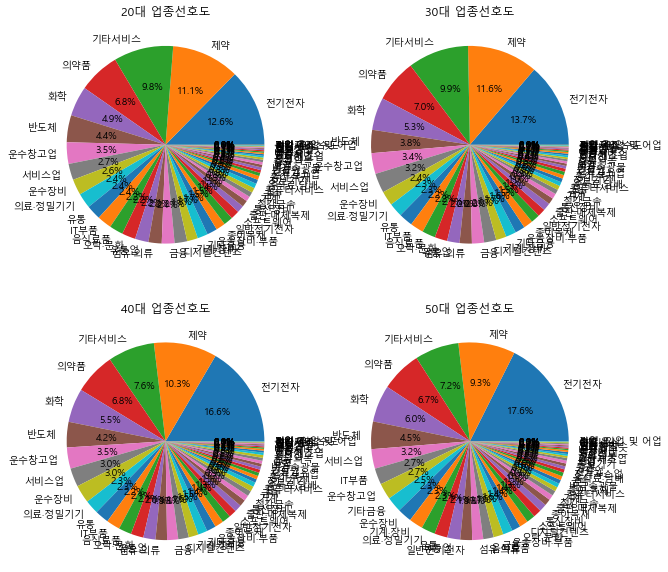

In [34]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.pie(df['업종명'][df['동일나이군구분코드']==20].value_counts(), labels=df.업종명.value_counts().index, autopct='%1.1f%%')
ax2.pie(df['업종명'][df['동일나이군구분코드']==30].value_counts(), labels=df.업종명.value_counts().index, autopct='%1.1f%%')
ax3.pie(df['업종명'][df['동일나이군구분코드']==40].value_counts(), labels=df.업종명.value_counts().index, autopct='%1.1f%%')
ax4.pie(df['업종명'][df['동일나이군구분코드']==50].value_counts(), labels=df['업종명'][df['동일나이군구분코드']==50].value_counts().index, autopct='%1.1f%%')

ax1.set_title('20대 업종선호도')
ax2.set_title('30대 업종선호도')
ax3.set_title('40대 업종선호도')
ax4.set_title('50대 업종선호도')

plt.show()

In [41]:
df.groupby('동일나이군구분코드')['시가총액'].mean()

동일나이군구분코드
20   26276507160302.65234
30   29270105208973.52344
40   34657414087260.55078
50   33836012774188.70312
Name: 시가총액, dtype: float64

In [42]:
df.groupby('동일나이군구분코드')['거래소구분코드'].value_counts()
# 2: kospi / 3: kosdaq

동일나이군구분코드  거래소구분코드
20         3          111665
           2           87525
30         3          178970
           2          148438
40         3          104365
           2          104146
50         3           51910
           2           50968
Name: 거래소구분코드, dtype: int64

In [43]:
df['수익률'] = (df['당일종가'] - df['실주문단가']) / df['실주문단가']
df.head()

,주문일자,고객성별구분코드,동일나이군구분코드,주문시간대,종목코드,상품명,거래소구분코드,실주문단가,총체결금액,당일종가,업종명,시가총액,수익률
0,20200128,1,30,1,091970,나노캠텍,3,3795,75900,4095,화학,60535578795,0.07905
1,20200326,1,40,2,091970,나노캠텍,3,1630,2275480,1615,화학,60535578795,-0.00920
2,20200128,1,40,1,091970,나노캠텍,3,3800,1672000,4095,화학,60535578795,0.07763
3,20200325,1,40,2,091970,나노캠텍,3,1510,409050,1485,화학,60535578795,-0.01656
4,20200128,1,20,3,091970,나노캠텍,3,4030,990150,4095,화학,60535578795,0.01613


In [44]:
df.groupby('동일나이군구분코드')['수익률'].mean()

동일나이군구분코드
20   -0.02138
30   -0.02197
40   -0.01790
50   -0.02181
Name: 수익률, dtype: float64

#### 20.01.20~20.03.31 기간은 1/20일 kospi 기준 2277 고점을 찍은 후 3/19일 1439 저점을 찍은 기간으로 역대급 우하양

## 결론
## 1. MZ 세대는 다른 세대보다 전기전자 업종에 투자비중이 낮았고, 제약, 기타 서비스 업종에 투자비중이 높았다.
## -> 코로나 유행시기여서 제약 업종이 투자 trend 였고, MZ 세대가 좀 더 트렌드에 따르는 투자성향이 있는 것을 알 수 있다.
## 2. MZ 세대는 다른 세대보다 kosdaq 투자비중이 높았고, 시가총액이 적은 종목에 투자하는 비중이 높았다.
## -> MZ 세대는 다른 세대보다 위험자산에 투자하는 것을 선호하며, 그에 따라 좀 더 높은 수익율을 내고자 함을 알 수 있다.